In [1]:
%matplotlib notebook  
import numpy as np
import matplotlib.pyplot as plt

In [2]:
boxsize = np.arange(1000)

In [3]:
mem_needed = 2.5*1.05*4.*(2.*boxsize)**3 / (1024.)**3

In [4]:
def box_for_mem(gb):
    return ((1024.)**3*gb/ (2.5*1.05*4. ))**(1./3.) / 2. 

<IPython.core.display.Javascript object>


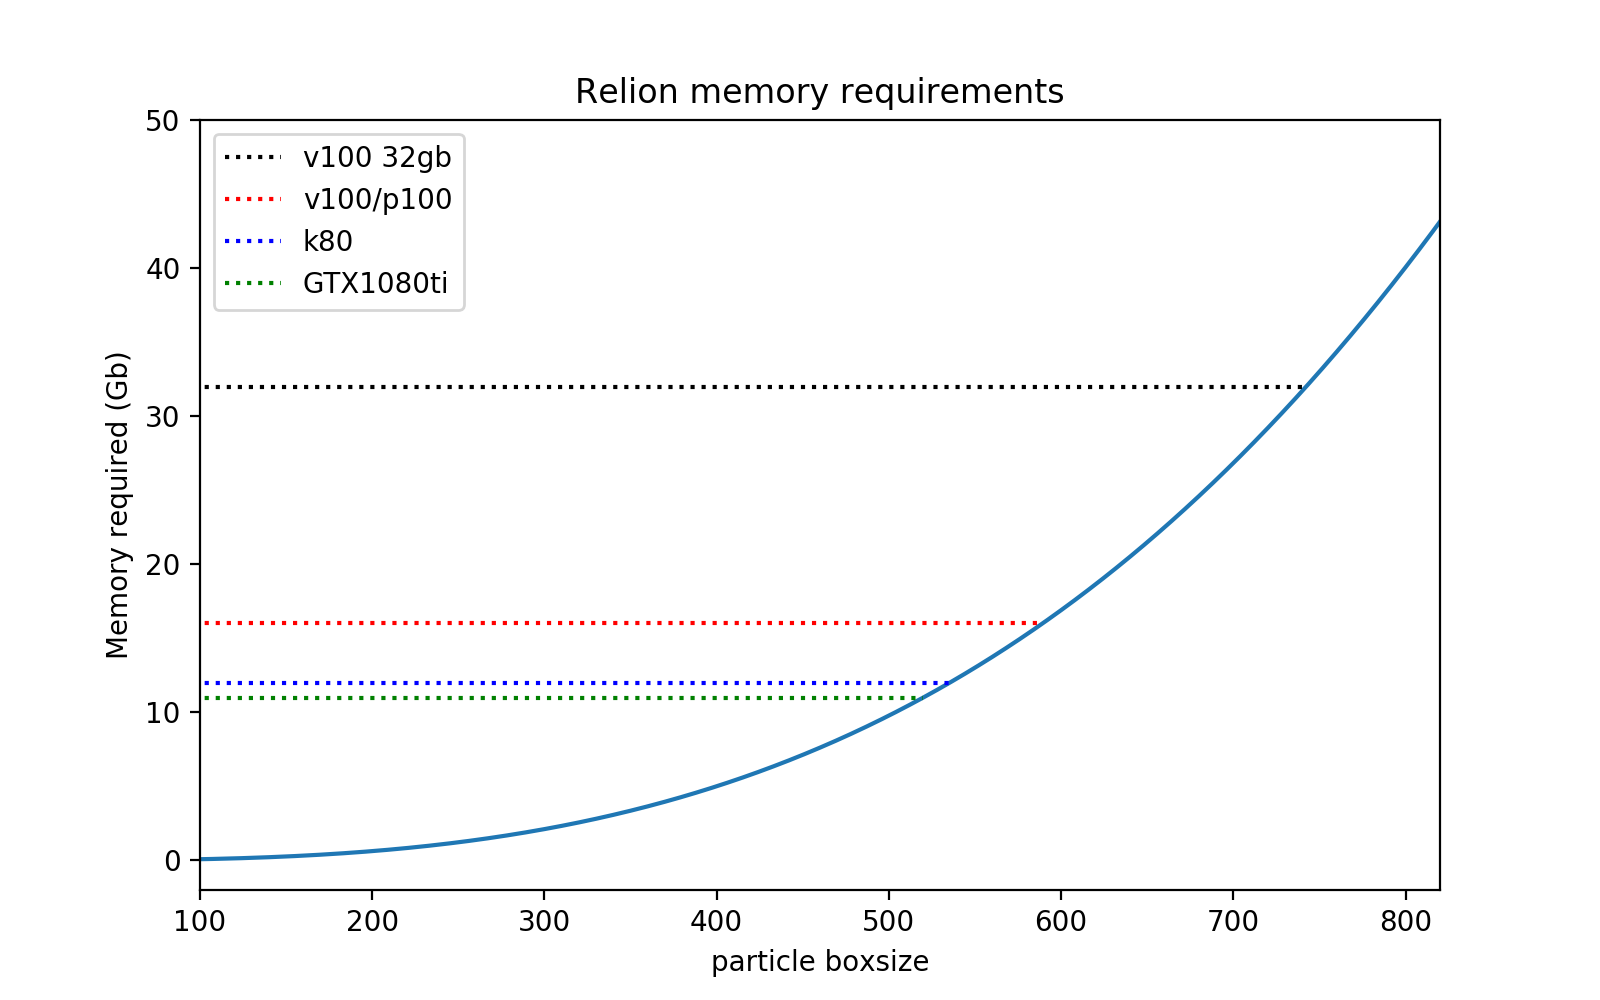

/Users/jmansour/envs/default/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [5]:
fig = plt.figure(figsize=(8,5))
ax1 = fig.add_subplot(111,title="Relion memory requirements")
ax1.set_ylabel("Memory required (Gb)")
ax1.set_xlabel("particle boxsize")
ax1.plot(boxsize,mem_needed, marker=None,linestyle='-')
ax1.legend()
# ax1.set_yticks(list(ax1.get_yticks())+[11,16,32])
# ax1.set_yticklabels([1,"key point",2])

import matplotlib.lines as mlines
# singlegputime = 5./dgx2dclass_arr[np.where(dgx2dclass_arr[:,0]==1.),1]
# line = mlines.Line2D([1, 8], [singlegputime, 8*singlegputime], color='green')
ax1.add_line(mlines.Line2D([0, box_for_mem(32)], [32,32], color='black'  , label='v100 32gb', linestyle=':'))
ax1.add_line(mlines.Line2D([0, box_for_mem(16)], [16,16], color='red'    , label='v100/p100', linestyle=':'))
ax1.add_line(mlines.Line2D([0, box_for_mem(12)], [12,12], color='blue'   , label='k80'      , linestyle=':'))
ax1.add_line(mlines.Line2D([0, box_for_mem(11)], [11,11], color='green'  , label='GTX1080ti', linestyle=':'))

# ax1.set_axisbelow(True)
# ax1.yaxis.grid(color='lightgray')
# ax1.xaxis.grid(color='lightgray')
ax1.legend()
ax1.set_xbound(100,820)
ax1.set_ybound(-2,50)


fig.show()

In [66]:
fig.savefig("memory.png")